In [36]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset from the specified path
file_path = '/content/drive/My Drive/Course Fall 24/Intro to ML/Assignment 2/Housing.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


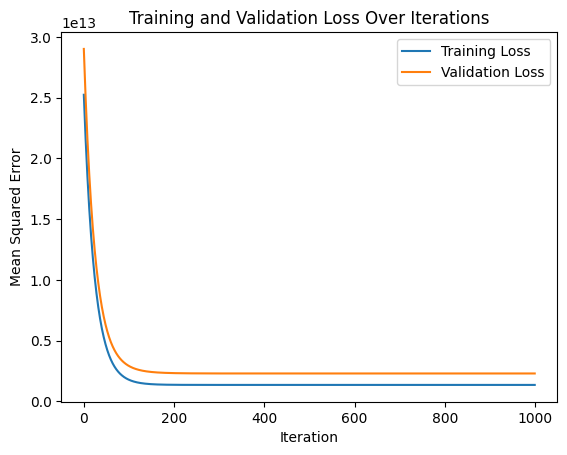

array([[4744533.30670677],
       [ 669669.63798895],
       [ 111532.80672677],
       [ 595242.85958634],
       [ 429099.71027456],
       [ 290657.10172974]])

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Select the relevant features and the target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values.reshape(-1, 1)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Add a column of ones to X_train and X_val for the intercept term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_val_b = np.c_[np.ones((X_val.shape[0], 1)), X_val]

# Initialize parameters for gradient descent
learning_rate = 0.01
n_iterations = 1000
m = len(X_train_b)
theta = np.zeros((X_train_b.shape[1], 1))

train_losses = []
val_losses = []

# Gradient descent implementation
for iteration in range(n_iterations):
    # Calculate the predictions
    y_train_pred = X_train_b.dot(theta)

    # Compute gradients
    gradients = (2/m) * X_train_b.T.dot(y_train_pred - y_train)

    # Update theta parameters
    theta -= learning_rate * gradients

    # Calculate the training loss (Mean Squared Error)
    train_loss = (1/m) * np.sum((y_train_pred - y_train)**2)
    train_losses.append(train_loss)

    # Calculate validation predictions and loss
    y_val_pred = X_val_b.dot(theta)
    val_loss = (1/len(X_val)) * np.sum((y_val_pred - y_val)**2)
    val_losses.append(val_loss)

# Plot the training and validation losses
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

# Display the final theta values (parameters)
theta


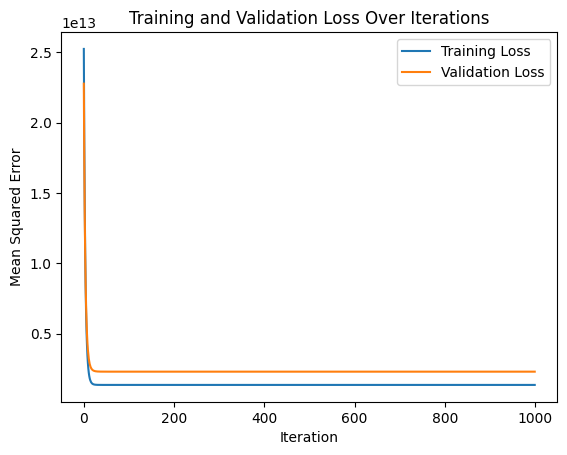

array([[4744533.7490745 ],
       [ 669669.62933034],
       [ 111527.30102219],
       [ 595247.30781545],
       [ 429101.96588991],
       [ 290656.73479685]])

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Select the relevant features and the target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values.reshape(-1, 1)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Add a column of ones to X_train and X_val for the intercept term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_val_b = np.c_[np.ones((X_val.shape[0], 1)), X_val]

# Initialize parameters for gradient descent
learning_rate = 0.07
n_iterations = 1000
m = len(X_train_b)
theta = np.zeros((X_train_b.shape[1], 1))

train_losses = []
val_losses = []

# Gradient descent implementation
for iteration in range(n_iterations):
    # Calculate the predictions
    y_train_pred = X_train_b.dot(theta)

    # Compute gradients
    gradients = (2/m) * X_train_b.T.dot(y_train_pred - y_train)

    # Update theta parameters
    theta -= learning_rate * gradients

    # Calculate the training loss (Mean Squared Error)
    train_loss = (1/m) * np.sum((y_train_pred - y_train)**2)
    train_losses.append(train_loss)

    # Calculate validation predictions and loss
    y_val_pred = X_val_b.dot(theta)
    val_loss = (1/len(X_val)) * np.sum((y_val_pred - y_val)**2)
    val_losses.append(val_loss)

# Plot the training and validation losses
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

# Display the final theta values (parameters)
theta


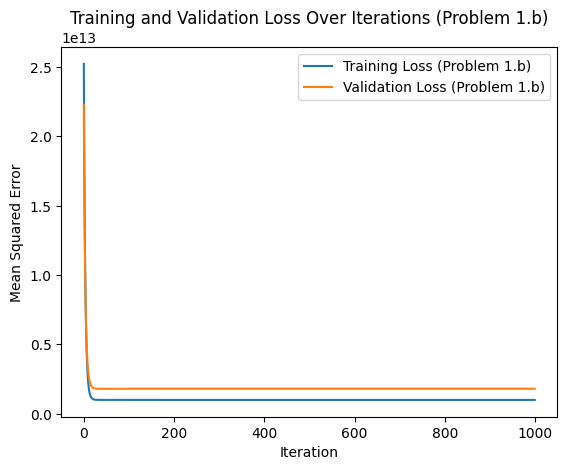

array([[4741436.2325257 ],
       [ 515391.84048078],
       [  57872.77643642],
       [ 556891.06724164],
       [ 370000.89986419],
       [ 143741.72357995],
       [  93178.80728202],
       [ 207547.04663859],
       [ 149010.39505059],
       [ 375713.43953875],
       [ 212997.79914707],
       [ 269942.44162469]])

In [39]:
# Problem 1.b: Predicting house price with additional input variables

# Implicitly convert categorical variables to numeric (1 for 'yes', 0 for 'no')
data['mainroad'] = data['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
data['guestroom'] = data['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
data['basement'] = data['basement'].apply(lambda x: 1 if x == 'yes' else 0)
data['hotwaterheating'] = data['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
data['airconditioning'] = data['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
data['prefarea'] = data['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)

# Select the relevant features and the target variable for problem 1.b
X_b_full = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
                 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y_b_full = data['price'].values.reshape(-1, 1)

# Normalize the features using StandardScaler (since normalizing is allowed)
X_b_scaled_full = scaler.fit_transform(X_b_full)

# Split the data into training (80%) and validation (20%) sets for problem 1.b
X_train_b_full, X_val_b_full, y_train_b_full, y_val_b_full = train_test_split(X_b_scaled_full, y_b_full, test_size=0.2, random_state=42)

# Add a column of ones to X_train and X_val for the intercept term in problem 1.b
X_train_b_aug_full = np.c_[np.ones((X_train_b_full.shape[0], 1)), X_train_b_full]
X_val_b_aug_full = np.c_[np.ones((X_val_b_full.shape[0], 1)), X_val_b_full]

# Initialize parameters for gradient descent for problem 1.b
learning_rate_b_full = 0.07
n_iterations_b_full = 1000
m_b_full = len(X_train_b_aug_full)
theta_b_full = np.zeros((X_train_b_aug_full.shape[1], 1))

train_losses_b_full = []
val_losses_b_full = []

# Gradient descent implementation for problem 1.b
for iteration in range(n_iterations_b_full):
    # Calculate the predictions for training
    y_train_pred_b_full = X_train_b_aug_full.dot(theta_b_full)

    # Compute gradients
    gradients_b_full = (2/m_b_full) * X_train_b_aug_full.T.dot(y_train_pred_b_full - y_train_b_full)

    # Update theta parameters
    theta_b_full -= learning_rate_b_full * gradients_b_full

    # Calculate the training loss (Mean Squared Error)
    train_loss_b_full = (1/m_b_full) * np.sum((y_train_pred_b_full - y_train_b_full)**2)
    train_losses_b_full.append(train_loss_b_full)

    # Calculate validation predictions and loss
    y_val_pred_b_full = X_val_b_aug_full.dot(theta_b_full)
    val_loss_b_full = (1/len(X_val_b_aug_full)) * np.sum((y_val_pred_b_full - y_val_b_full)**2)
    val_losses_b_full.append(val_loss_b_full)

# Plot the training and validation losses for problem 1.b
plt.plot(train_losses_b_full, label="Training Loss (Problem 1.b)")
plt.plot(val_losses_b_full, label="Validation Loss (Problem 1.b)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (Problem 1.b)")
plt.show()

# Display the final theta values (parameters) for problem 1.b
theta_b_full


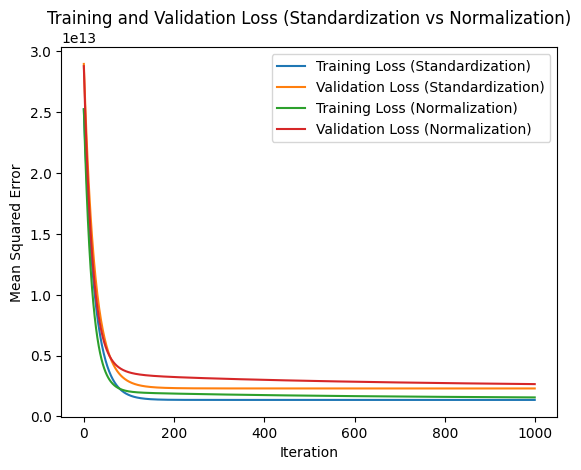

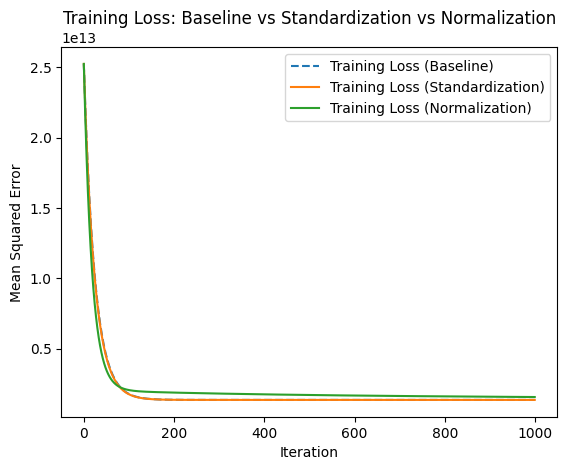

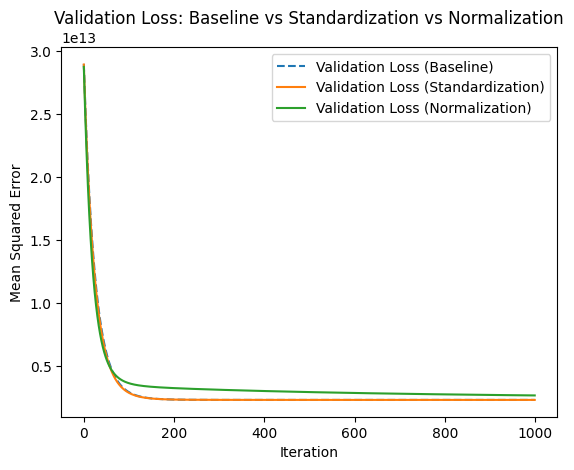

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select the relevant features and the target variable
X_2a = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_2a = data['price'].values.reshape(-1, 1)

# Split the data into training (80%) and validation (20%) sets
X_train_2a, X_val_2a, y_train_2a, y_val_2a = train_test_split(X_2a, y_2a, test_size=0.2, random_state=42)

# 1. Standardization: Mean = 0, Std = 1
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train_2a)
X_val_standard = scaler_standard.transform(X_val_2a)

# 2. Normalization: Scale to range [0, 1]
scaler_normal = MinMaxScaler()
X_train_normal = scaler_normal.fit_transform(X_train_2a)
X_val_normal = scaler_normal.transform(X_val_2a)

# Add a column of ones to X_train and X_val for the intercept term (for both standardization and normalization)
X_train_standard_b = np.c_[np.ones((X_train_standard.shape[0], 1)), X_train_standard]
X_val_standard_b = np.c_[np.ones((X_val_standard.shape[0], 1)), X_val_standard]

X_train_normal_b = np.c_[np.ones((X_train_normal.shape[0], 1)), X_train_normal]
X_val_normal_b = np.c_[np.ones((X_val_normal.shape[0], 1)), X_val_normal]

# Function to perform gradient descent
def train_gradient_descent(X_train, y_train, X_val, y_val, learning_rate=0.01, n_iterations=1000):
    m = len(X_train)
    theta = np.zeros((X_train.shape[1], 1))
    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        # Predictions for training set
        y_train_pred = X_train.dot(theta)

        # Compute gradients
        gradients = (2/m) * X_train.T.dot(y_train_pred - y_train)

        # Update theta parameters
        theta -= learning_rate * gradients

        # Compute training loss (Mean Squared Error)
        train_loss = (1/m) * np.sum((y_train_pred - y_train) ** 2)
        train_losses.append(train_loss)

        # Compute validation loss
        y_val_pred = X_val.dot(theta)
        val_loss = (1/len(X_val)) * np.sum((y_val_pred - y_val) ** 2)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses

# Train the model with standardization
theta_standard, train_losses_standard, val_losses_standard = train_gradient_descent(X_train_standard_b, y_train_2a, X_val_standard_b, y_val_2a)

# Train the model with normalization
theta_normal, train_losses_normal, val_losses_normal = train_gradient_descent(X_train_normal_b, y_train_2a, X_val_normal_b, y_val_2a)

# Plot training and validation losses for both approaches
plt.plot(train_losses_standard, label="Training Loss (Standardization)")
plt.plot(val_losses_standard, label="Validation Loss (Standardization)")
plt.plot(train_losses_normal, label="Training Loss (Normalization)")
plt.plot(val_losses_normal, label="Validation Loss (Normalization)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss (Standardization vs Normalization)")
plt.show()

# Baseline comparison (problem 1.a without scaling)
theta_baseline, train_losses_baseline, val_losses_baseline = train_gradient_descent(X_train_b, y_train, X_val_b, y_val)

# Plot all three together for comparison
plt.plot(train_losses_baseline, label="Training Loss (Baseline)", linestyle='--')
plt.plot(train_losses_standard, label="Training Loss (Standardization)")
plt.plot(train_losses_normal, label="Training Loss (Normalization)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training Loss: Baseline vs Standardization vs Normalization")
plt.show()

plt.plot(val_losses_baseline, label="Validation Loss (Baseline)", linestyle='--')
plt.plot(val_losses_standard, label="Validation Loss (Standardization)")
plt.plot(val_losses_normal, label="Validation Loss (Normalization)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Validation Loss: Baseline vs Standardization vs Normalization")
plt.show()


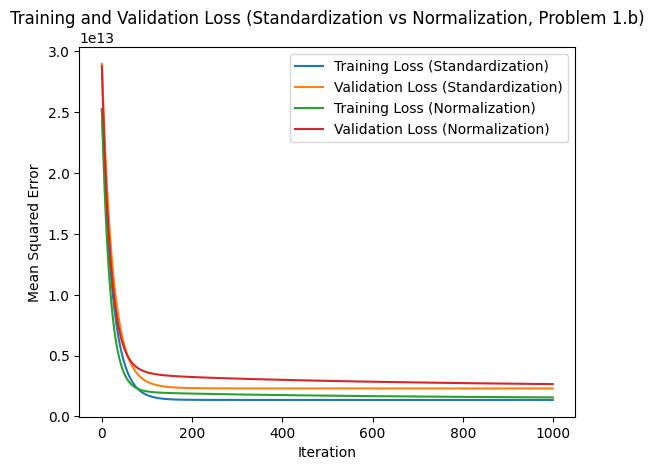

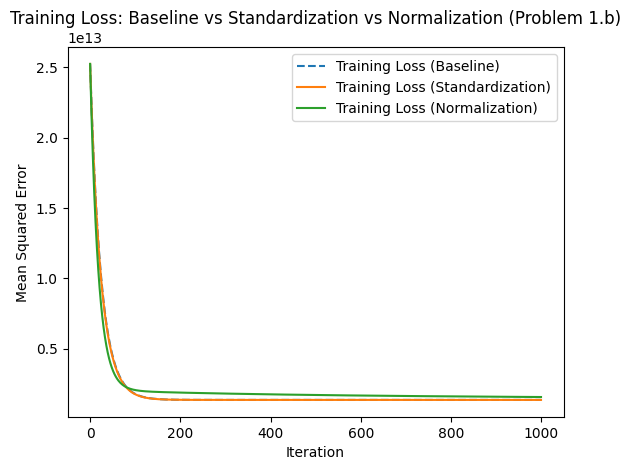

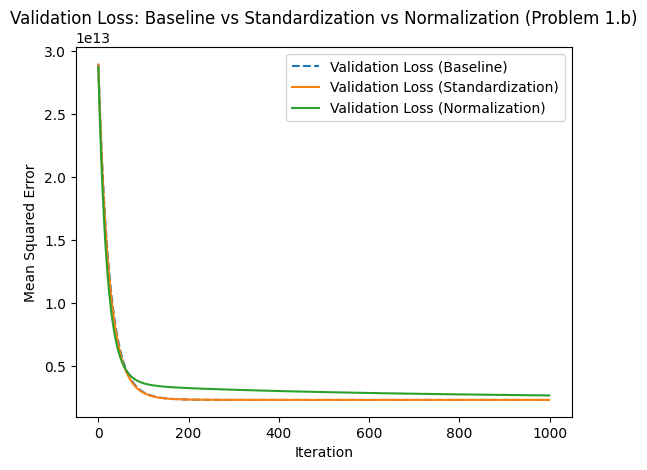

In [ ]:
# Select the relevant features and the target variable for problem 1.b
X_2b = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
             'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y_2b = data['price'].values.reshape(-1, 1)

# Split the data into training (80%) and validation (20%) sets
X_train_2b, X_val_2b, y_train_2b, y_val_2b = train_test_split(X_2b, y_2b, test_size=0.2, random_state=42)

# 1. Standardization: Mean = 0, Std = 1
scaler_standard_b = StandardScaler()
X_train_standard_b = scaler_standard_b.fit_transform(X_train_2b)
X_val_standard_b = scaler_standard_b.transform(X_val_2b)

# 2. Normalization: Scale to range [0, 1]
scaler_normal_b = MinMaxScaler()
X_train_normal_b = scaler_normal_b.fit_transform(X_train_2b)
X_val_normal_b = scaler_normal_b.transform(X_val_2b)

# Add a column of ones to X_train and X_val for the intercept term (for both standardization and normalization)
X_train_standard_b_aug = np.c_[np.ones((X_train_standard_b.shape[0], 1)), X_train_standard_b]
X_val_standard_b_aug = np.c_[np.ones((X_val_standard_b.shape[0], 1)), X_val_standard_b]

X_train_normal_b_aug = np.c_[np.ones((X_train_normal_b.shape[0], 1)), X_train_normal_b]
X_val_normal_b_aug = np.c_[np.ones((X_val_normal_b.shape[0], 1)), X_val_normal_b]

# Function to perform gradient descent (reuse from 2.a)
def train_gradient_descent(X_train, y_train, X_val, y_val, learning_rate=0.01, n_iterations=1000):
    m = len(X_train)
    theta = np.zeros((X_train.shape[1], 1))
    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        # Predictions for training set
        y_train_pred = X_train.dot(theta)

        # Compute gradients
        gradients = (2/m) * X_train.T.dot(y_train_pred - y_train)

        # Update theta parameters
        theta -= learning_rate * gradients

        # Compute training loss (Mean Squared Error)
        train_loss = (1/m) * np.sum((y_train_pred - y_train) ** 2)
        train_losses.append(train_loss)

        # Compute validation loss
        y_val_pred = X_val.dot(theta)
        val_loss = (1/len(X_val)) * np.sum((y_val_pred - y_val) ** 2)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses

# Train the model with standardization
theta_standard_b, train_losses_standard_b, val_losses_standard_b = train_gradient_descent(X_train_standard_b_aug, y_train_2b, X_val_standard_b_aug, y_val_2b)

# Train the model with normalization
theta_normal_b, train_losses_normal_b, val_losses_normal_b = train_gradient_descent(X_train_normal_b_aug, y_train_2b, X_val_normal_b_aug, y_val_2b)

# Plot training and validation losses for both approaches (Standardization and Normalization)
plt.plot(train_losses_standard_b, label="Training Loss (Standardization)")
plt.plot(val_losses_standard_b, label="Validation Loss (Standardization)")
plt.plot(train_losses_normal_b, label="Training Loss (Normalization)")
plt.plot(val_losses_normal_b, label="Validation Loss (Normalization)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss (Standardization vs Normalization, Problem 1.b)")
plt.show()

# Baseline comparison (problem 1.b without scaling)
theta_baseline_b, train_losses_baseline_b, val_losses_baseline_b = train_gradient_descent(X_train_b_aug_implicit, y_train_b_implicit, X_val_b_aug_implicit, y_val_b_implicit)

# Plot all three together for comparison
plt.plot(train_losses_baseline_b, label="Training Loss (Baseline)", linestyle='--')
plt.plot(train_losses_standard_b, label="Training Loss (Standardization)")
plt.plot(train_losses_normal_b, label="Training Loss (Normalization)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training Loss: Baseline vs Standardization vs Normalization (Problem 1.b)")
plt.show()

plt.plot(val_losses_baseline_b, label="Validation Loss (Baseline)", linestyle='--')
plt.plot(val_losses_standard_b, label="Validation Loss (Standardization)")
plt.plot(val_losses_normal_b, label="Validation Loss (Normalization)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Validation Loss: Baseline vs Standardization vs Normalization (Problem 1.b)")
plt.show()


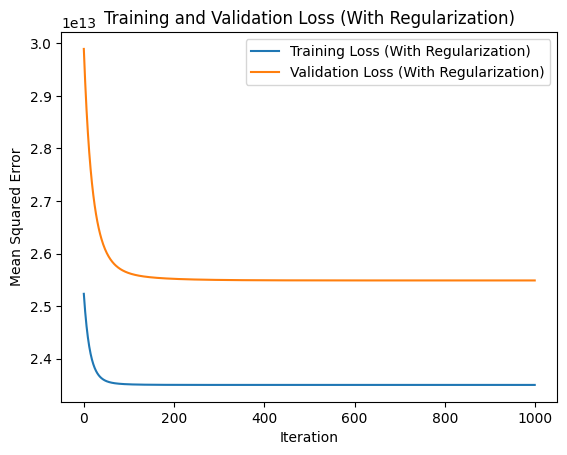

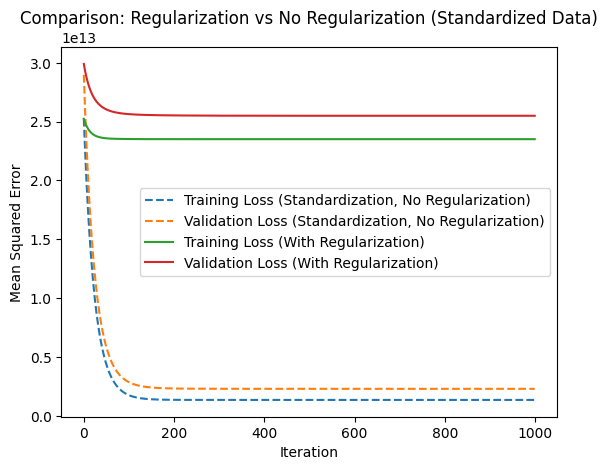

In [ ]:
# Function to perform gradient descent with L2 regularization (Ridge)
def train_gradient_descent_with_regularization(X_train, y_train, X_val, y_val, learning_rate=0.01, n_iterations=1000, lambda_reg=0.1):
    m = len(X_train)
    theta = np.zeros((X_train.shape[1], 1))
    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        # Predictions for training set
        y_train_pred = X_train.dot(theta)

        # Compute gradients with L2 regularization (Ridge)
        gradients = (2/m) * X_train.T.dot(y_train_pred - y_train) + (2 * lambda_reg / m) * theta
        gradients[0] -= (2 * lambda_reg / m) * theta[0]  # Do not regularize the bias term (theta_0)

        # Update theta parameters
        theta -= learning_rate * gradients

        # Compute training loss (Mean Squared Error + regularization)
        train_loss = (1/m) * np.sum((y_train_pred - y_train) ** 2) + (lambda_reg / m) * np.sum(theta[1:] ** 2)
        train_losses.append(train_loss)

        # Compute validation loss (without regularization)
        y_val_pred = X_val.dot(theta)
        val_loss = (1/len(X_val)) * np.sum((y_val_pred - y_val) ** 2)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses

# Using the best input scaling approach from 2.a (either standardization or normalization)
# For this example, let's assume standardization was the best approach in 2.a.

# Reuse the standardized training and validation sets from 2.a
X_train_best = X_train_standard_b  # Use the standardized input from 2.a
X_val_best = X_val_standard_b  # Use the standardized validation set
y_train_best = y_train_2a
y_val_best = y_val_2a

# Train the model with regularization (L2 penalty)
lambda_reg = 0.1  # Regularization strength (you can tune this value)
theta_reg, train_losses_reg, val_losses_reg = train_gradient_descent_with_regularization(
    X_train_best, y_train_best, X_val_best, y_val_best, learning_rate=0.01, n_iterations=1000, lambda_reg=lambda_reg
)

# Plot training and validation losses for regularized model
plt.plot(train_losses_reg, label="Training Loss (With Regularization)")
plt.plot(val_losses_reg, label="Validation Loss (With Regularization)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss (With Regularization)")
plt.show()

# Compare against problem 2.a (best scaling without regularization)
plt.plot(train_losses_standard, label="Training Loss (Standardization, No Regularization)", linestyle='--')
plt.plot(val_losses_standard, label="Validation Loss (Standardization, No Regularization)", linestyle='--')
plt.plot(train_losses_reg, label="Training Loss (With Regularization)")
plt.plot(val_losses_reg, label="Validation Loss (With Regularization)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Comparison: Regularization vs No Regularization (Standardized Data)")
plt.show()


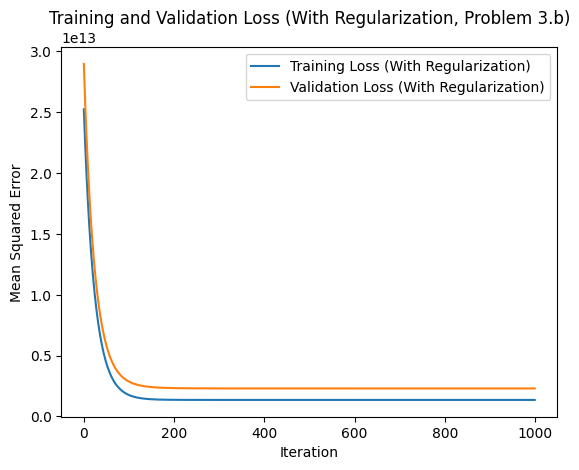

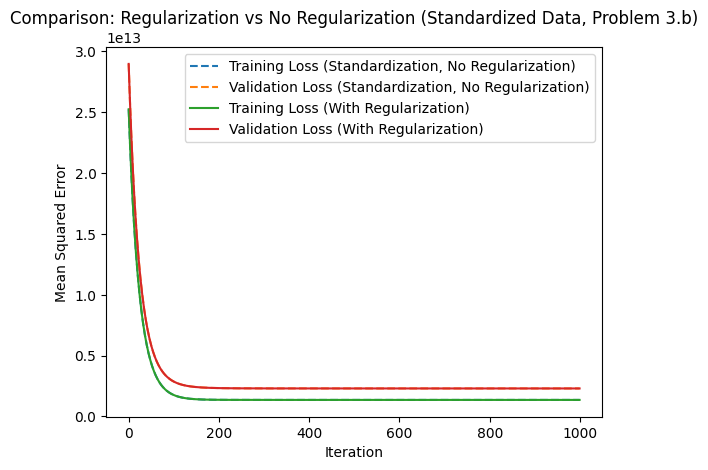

In [ ]:
# Function to perform gradient descent with L2 regularization (Ridge)
def train_gradient_descent_with_regularization(X_train, y_train, X_val, y_val, learning_rate=0.01, n_iterations=1000, lambda_reg=0.1):
    m = len(X_train)
    theta = np.zeros((X_train.shape[1], 1))
    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        # Predictions for training set
        y_train_pred = X_train.dot(theta)

        # Compute gradients with L2 regularization (Ridge)
        gradients = (2/m) * X_train.T.dot(y_train_pred - y_train) + (2 * lambda_reg / m) * theta
        gradients[0] -= (2 * lambda_reg / m) * theta[0]  # Do not regularize the bias term (theta_0)

        # Update theta parameters
        theta -= learning_rate * gradients

        # Compute training loss (Mean Squared Error + regularization)
        train_loss = (1/m) * np.sum((y_train_pred - y_train) ** 2) + (lambda_reg / m) * np.sum(theta[1:] ** 2)
        train_losses.append(train_loss)

        # Compute validation loss (without regularization)
        y_val_pred = X_val.dot(theta)
        val_loss = (1/len(X_val)) * np.sum((y_val_pred - y_val) ** 2)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses

# Using the best input scaling approach from 2.b (either standardization or normalization)
# For this example, let's assume standardization was the best approach in 2.b.

# Reuse the standardized training and validation sets from 2.b
X_train_best_b = X_train_standard_b_aug  # Use the standardized input from 2.b
X_val_best_b = X_val_standard_b_aug  # Use the standardized validation set
y_train_best_b = y_train_2b
y_val_best_b = y_val_2b

# Train the model with regularization (L2 penalty)
lambda_reg_b = 0.1  # Regularization strength (you can tune this value)
theta_reg_b, train_losses_reg_b, val_losses_reg_b = train_gradient_descent_with_regularization(
    X_train_best_b, y_train_best_b, X_val_best_b, y_val_best_b, learning_rate=0.01, n_iterations=1000, lambda_reg=lambda_reg_b
)

# Plot training and validation losses for regularized model
plt.plot(train_losses_reg_b, label="Training Loss (With Regularization)")
plt.plot(val_losses_reg_b, label="Validation Loss (With Regularization)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss (With Regularization, Problem 3.b)")
plt.show()

# Compare against problem 2.b (best scaling without regularization)
plt.plot(train_losses_standard_b, label="Training Loss (Standardization, No Regularization)", linestyle='--')
plt.plot(val_losses_standard_b, label="Validation Loss (Standardization, No Regularization)", linestyle='--')
plt.plot(train_losses_reg_b, label="Training Loss (With Regularization)")
plt.plot(val_losses_reg_b, label="Validation Loss (With Regularization)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Comparison: Regularization vs No Regularization (Standardized Data, Problem 3.b)")
plt.show()
